# Sensitivity analysis
1. identify random sample stratified by sex, copd, lung cancer. Including all the lung cancer cases
2. aggregate scores

### 1. Create stratified random sample

In [208]:
import os
import numpy as np
import pandas as pd
import random
from scipy import stats

In [26]:
clinical_path = "/nfs/masi/SPORE/file/clinical/combine_17and18.xlsx"
cancer_path = "/nfs/masi/SPORE/file/clinical/SPORE_diaginfo_v1.xlsx"
# pd.set_option('display.max_colwidth', None)
clinical_df = pd.read_excel(clinical_path)
cancer_df = pd.read_excel(cancer_path)

cancer_df

,SPORE,Path,Stage,Column1
0,SPORE_00000739,"9/10/18: AXILLARY LYMPH NODE, NEEDLE CORE BIOP...",1A classic hodgkin lymphoma,CHL 1A
1,SPORE_00000206,"6/21/16: adeno, predominant acinar pattern",T1aN0,IA
2,SPORE_00000349,9/16/16: FNA- suspicious for CA,Clinical: T1bN0,IA
3,SPORE_00000393,"12/8/16: RLL: ADENOCARCINOMA, LEPIDIC AND ACIN...",2 synchronous stage I (bilat),IA
4,SPORE_00000420,"inconclusive, non-surgical candidate",Presumed stage I NSCLC,IA
5,SPORE_00000424,"7/7/17: INVASIVE MUCINOUS ADENOCARCINOMA, 1.6...",T1aN0,IA
6,SPORE_00000087,"2/2/17 NON-SMALL CELL CARCINOMA, FAVOR SQUAMOU...",Clinical: T1aN0 I NSCLC,IA
7,SPORE_00000533,"3/30/19: Lung, Left upper lobe, wedge resectio...",T1cN0,IA
8,SPORE_00000538,"5/23/17: Inconclusive, clinical diagnosis deci...",Clinical stage I NSCLC,IA
9,SPORE_00000104,6/13/17: Carcinoid tumor,T1aN0,IA


In [27]:
print(len(clinical_df[clinical_df['copd'].notna()]))
print(len(clinical_df[clinical_df['copd']=='Yes']))
print(len(clinical_df[clinical_df['copd']=='No']))

1390
402
988


In [28]:
clinical_df = clinical_df[clinical_df['copd'].notna() & clinical_df['sex'].notna()]
cancer_df['cancer']=cancer_df["Path"].notna()

In [29]:
# rename and select columns
cancer_df = cancer_df.rename(columns={"SPORE":"sub_name"})
clinical_df = clinical_df[['sub_name','sex','copd']]
cancer_df = cancer_df[['sub_name', 'cancer']]

# left join
join_df = clinical_df.merge(cancer_df, how="left", on="sub_name")

# some preprocessing of column values
join_df['cancer'] = join_df['cancer'].notna()
join_df['copd'] = join_df['copd']=="Yes"
join_df['sub_name'] = join_df['sub_name'].apply(lambda x: x.split("_")[1])
join_df

,sub_name,sex,copd,cancer
0,00000006,F,False,False
1,00000010,F,False,False
2,00000012,F,False,False
3,00000015,F,False,False
4,00000019,F,False,False
...,...,...,...,...
1385,00000604,F,False,False
1386,00001128,F,True,False
1387,00000411,M,False,False
1388,00000459,M,False,False


In [30]:
# randomly sample 
random_state = 10
num_cancer = len(join_df[join_df['cancer']==True])
strat_sample1 = join_df.groupby(['sex', 'copd']).sample(40)
cancer_sample = join_df[join_df['cancer']==True] # add all cancer cases
# strat_sample2 = join_df.groupby(['cancer']).sample(num_cancer) # sample all cancer cases
print(len(strat_sample1), len(cancer_sample))

160 44


In [32]:
sample = pd.concat([strat_sample1, cancer_sample])
sample = sample.drop_duplicates()
sample

,sub_name,sex,copd,cancer
636,00000296,F,False,False
123,00000353,F,False,False
1118,00001013,F,False,False
1109,00000702,F,False,False
1094,00000086,F,False,False
...,...,...,...,...
794,00000818,F,True,True
812,00000258,F,False,True
897,00000893,M,True,True
905,00000900,M,False,True


In [33]:
out_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/clinical/sample2_sex_copd_cancer.csv"
sample.to_csv(out_path, index=False)
a = pd.read_csv(out_path, converters={'sub_name':str})
a

,sub_name,sex,copd,cancer
0,00000296,F,False,False
1,00000353,F,False,False
2,00001013,F,False,False
3,00000702,F,False,False
4,00000086,F,False,False
...,...,...,...,...
181,00000818,F,True,True
182,00000258,F,False,True
183,00000893,M,True,True
184,00000900,M,False,True


In [34]:
a[['cancer', 'copd', 'sex']].value_counts()

cancer  copd   sex
False   False  F      39
               M      37
        True   F      37
               M      35
True    False  M      11
        True   M      11
        False  F      10
        True   F       6
dtype: int64

In [2]:
infer_df = pd.read_csv("/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/infer_vlsp.csv")
infer_df

,pid,scanid
0,27,00000027time20170510
1,747,00000747time20170727
2,218,00000218time20180502
3,584,00000584time20130517
4,32,00000032time20140428
...,...,...
343,27,00000027time20160502
344,101,00000101time20170302
345,444,00000444time20180510
346,273,00000273time20180606


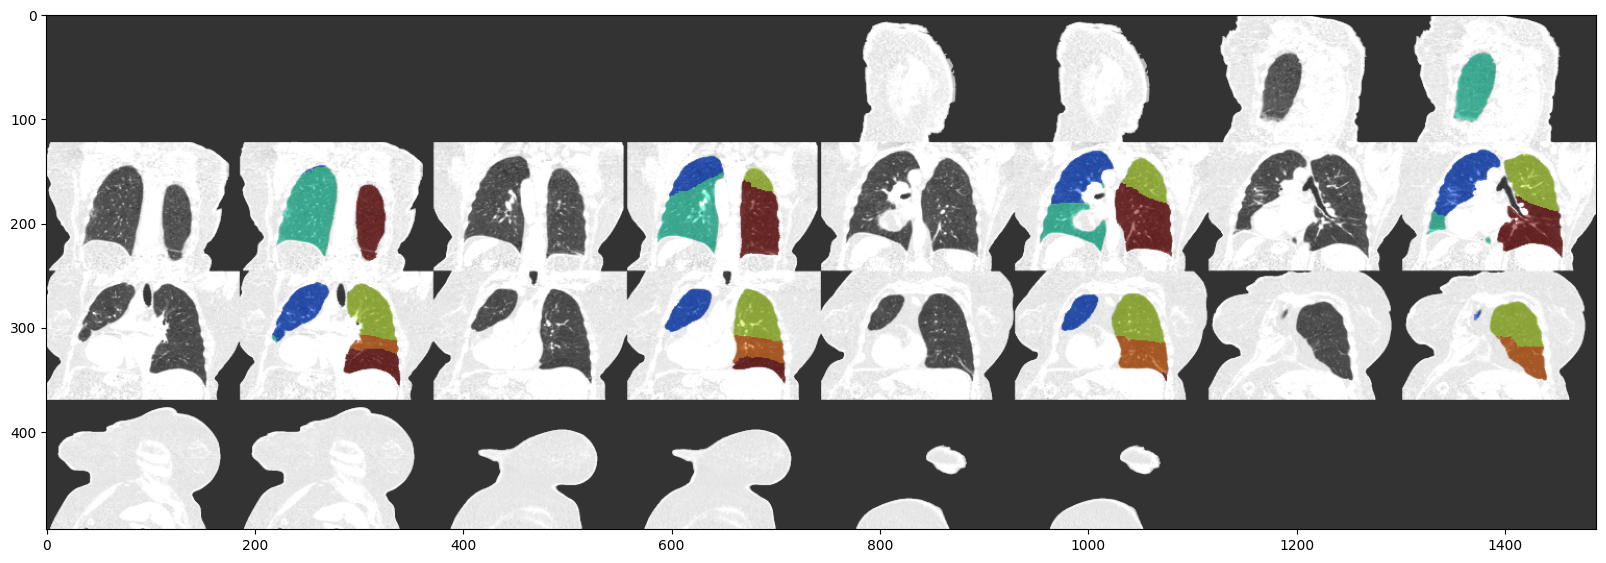

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/home/litz/data/vlsp/lobe/clip/0823cval_fold1/00000027time20170510_coronal.png')
plt.figure(figsize=(20,20))
plt.imshow(img)

### 2. Analyze qualitative scores

In [64]:
# join sample 2 with scores from sample 1
score1_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/infer_vlsp.csv"
score1_df = pd.read_csv(score1_path, converters={'pid':str, 'scanid':str})
score_df['pid'] = score_df['pid'].apply(lambda x: x.zfill(8))

score2_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/infer_vlsp_0823cval_fold4.csv"
clip_dir = "/home/litz/data/vlsp/lobe/clip/0823cval_fold1/"
scanids = []
for fname in os.listdir(clip_dir):
    scanid = fname.split("_")[0]
    scanids.append(scanid)
pids = [scanid.split("time")[0] for scanid in scanids]
score2_df = pd.DataFrame({"pid":pids, "scanid":scanids})
score2_df = score2_df.sort_values(by=['scanid'])

jscore_df = score_df.merge(score2_df, on=["pid", "scanid"])
jscore_df

score2_df
# score2_df.to_csv(score2_path, index_label=False, index=False)


,pid,scanid
261,00000012,00000012time20170317
288,00000012,00000012time20180411
246,00000019,00000019time20180305
235,00000021,00000021time20160727
12,00000021,00000021time20171025
...,...,...
239,00001099,00001099time20180517
208,00001100,00001100time20180517
98,00001124,00001124time20180105
50,00001127,00001127time20180307


In [65]:
score_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/infer_vlsp.csv"
sample_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/clinical/sample_sex_copd_cancer.csv"
score_df = pd.read_csv(score_path, converters={'pid':str, 'scanid':str})
sample_df = pd.read_csv(sample_path, converters={'sub_name':str})
sample_df = sample_df.rename(columns={'sub_name':'pid'})
# zero pad pid
score_df['pid'] = score_df['pid'].apply(lambda x: x.zfill(8))
score_df

,pid,scanid,score,description
0,00000012,00000012time20170317,5,NaN
1,00000012,00000012time20180411,5,NaN
2,00000019,00000019time20180305,5,NaN
3,00000021,00000021time20160727,4,NaN
4,00000021,00000021time20171025,5,NaN
...,...,...,...,...
290,00001099,00001099time20180517,5,NaN
291,00001100,00001100time20180517,5,NaN
292,00001124,00001124time20180105,5,NaN
293,00001127,00001127time20180307,5,NaN


In [66]:
pid_score_df = score_df.groupby(['pid'], as_index=False).mean()
merged_df = pid_score_df.merge(sample_df, on=['pid'])
# merged_df['cancer', 'copd', 'sex'].value_counts()
merged_df[['cancer', 'copd', 'sex']].value_counts()

cancer  copd   sex
False   False  M      50
               F      43
        True   F      39
               M      34
True    False  F       7
               M       7
        True   M       6
               F       1
dtype: int64

In [67]:
# aggregate statistics by clinical variable
cancer = merged_df.groupby(['cancer'], as_index=False).agg({"score":[np.mean, np.std]})
copd = merged_df.groupby(['copd'], as_index=False).agg({"score":[np.mean, np.std]})
sex = merged_df.groupby(['sex'], as_index=False).agg({"score":[np.mean, np.std]})
display(cancer)
display(copd)
display(sex)

cancer     score          
              mean       std
0  False  4.246486  0.846877
1   True  4.448413  0.717091

copd     score         
              mean      std
0  False  4.343458  0.80288
1   True  4.169792  0.86911

sex     score          
           mean       std
0   F  4.518519  0.729461
1   M  4.037801  0.861421

In [210]:
cancer = merged_df[merged_df['cancer']==True]['score'].tolist()
nocancer = merged_df[merged_df['cancer']==False]['score'].tolist()
print(stats.ttest_ind(cancer, nocancer))
copd = merged_df[merged_df['copd']==True]['score'].tolist()
nocopd = merged_df[merged_df['copd']==False]['score'].tolist()
print(stats.ttest_ind(copd, nocopd))
male = merged_df[merged_df['sex']=='M']['score'].tolist()
female = merged_df[merged_df['sex']=='F']['score'].tolist()
print(stats.ttest_ind(male, female))

Ttest_indResult(statistic=0.9553647050853287, pvalue=0.34017817161675556)
Ttest_indResult(statistic=-1.1876769198307102, pvalue=0.2359193513794991)
Ttest_indResult(statistic=-4.130422561054523, pvalue=4.7241736294500525e-05)


#### Plot distribution of score counts

In [68]:
# score counts for each group, compute without grouping by pid
merged_df = score_df.merge(sample_df, on=['pid'])
counts_df = merged_df.groupby(['cancer', 'copd', 'sex', 'score']).size().unstack(fill_value=0)
counts_df.reset_index(inplace=True)
counts_df

score,cancer,copd,sex,2,3,4,5
0,False,False,F,1,2,12,47
1,False,False,M,3,22,24,28
2,False,True,F,3,6,19,34
3,False,True,M,5,11,24,15
4,True,False,F,2,4,2,8
5,True,False,M,0,2,1,10
6,True,True,F,0,0,0,1
7,True,True,M,0,0,4,6


In [69]:

import matplotlib.pyplot as plt
import seaborn as sns
# counts in long format
merged_df
# counts_long = pd.melt(counts_df, id_vars=['cancer', 'copd', 'sex'], value_vars=[2,3,4,5])
# counts_long


,pid,scanid,score,description,sex,copd,cancer
0,00000012,00000012time20170317,5,NaN,F,False,False
1,00000012,00000012time20180411,5,NaN,F,False,False
2,00000019,00000019time20180305,5,NaN,F,False,False
3,00000021,00000021time20160727,4,NaN,F,True,False
4,00000021,00000021time20171025,5,NaN,F,True,False
...,...,...,...,...,...,...,...
291,00001099,00001099time20180517,5,NaN,F,True,False
292,00001100,00001100time20180517,5,NaN,F,True,False
293,00001124,00001124time20180105,5,NaN,F,False,False
294,00001127,00001127time20180307,5,NaN,F,False,False


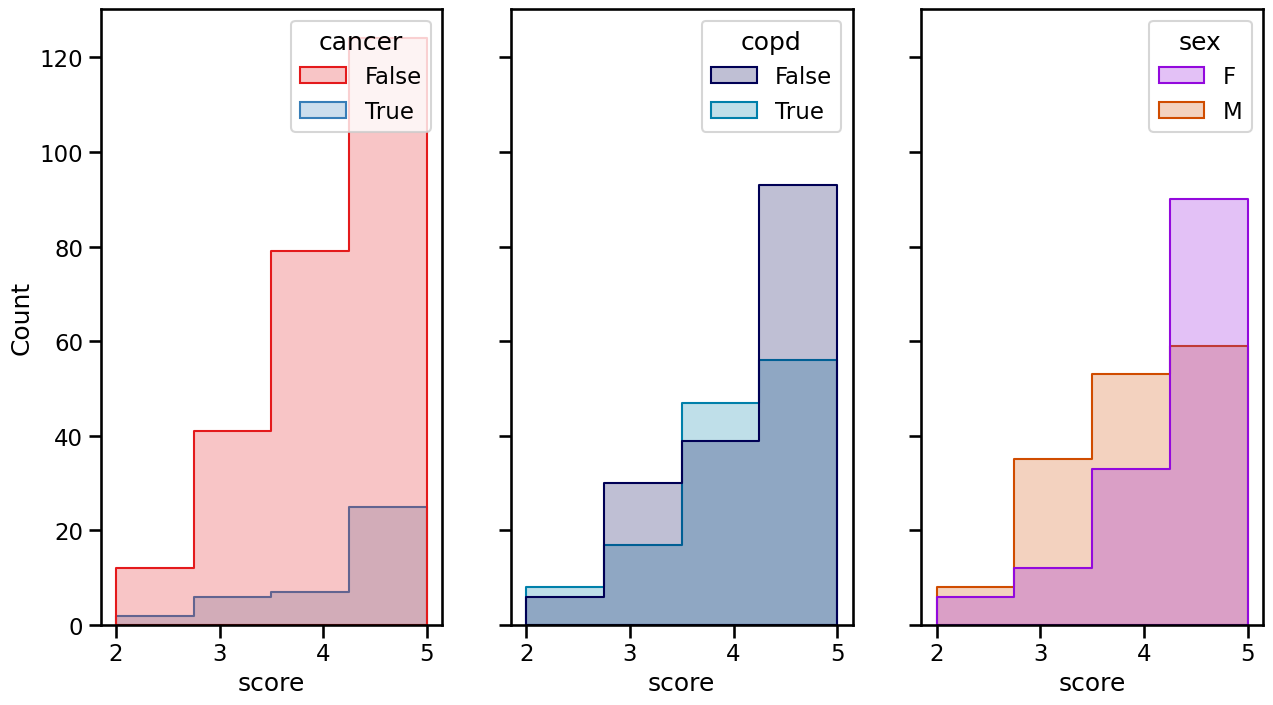

In [192]:
sns.set_context(context="talk")
f, ax = plt.subplots(1, 3, figsize=(15,8), sharey=True)
ax[0] = sns.histplot(merged_df, x='score', hue='cancer', bins=4, binrange=(2,5),
                     multiple="layer", element="step", ax=ax[0], palette="Set1")
ax[1] = sns.histplot(merged_df, x='score', hue='copd', bins=4, binrange=(2,5),
                     multiple="layer", element="step",ax=ax[1], palette="ocean")
ax[2] = sns.histplot(merged_df, x='score', hue='sex', bins=4, binrange=(2,5),
                     multiple="layer", element="step",ax=ax[2], palette="gnuplot")
# tick configuration
min_val = 2
max_val = 5
val_width = max_val - min_val
n_bins = 4
bin_width = val_width/n_bins
# plt.xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width))
plt.show()

In [75]:
counts_long.groupby(['cancer', 'score'], as_index=False).sum()

,cancer,score,copd,value
0,False,2,2,12
1,False,3,2,41
2,False,4,2,79
3,False,5,2,124
4,True,2,2,2
5,True,3,2,6
6,True,4,2,7
7,True,5,2,25


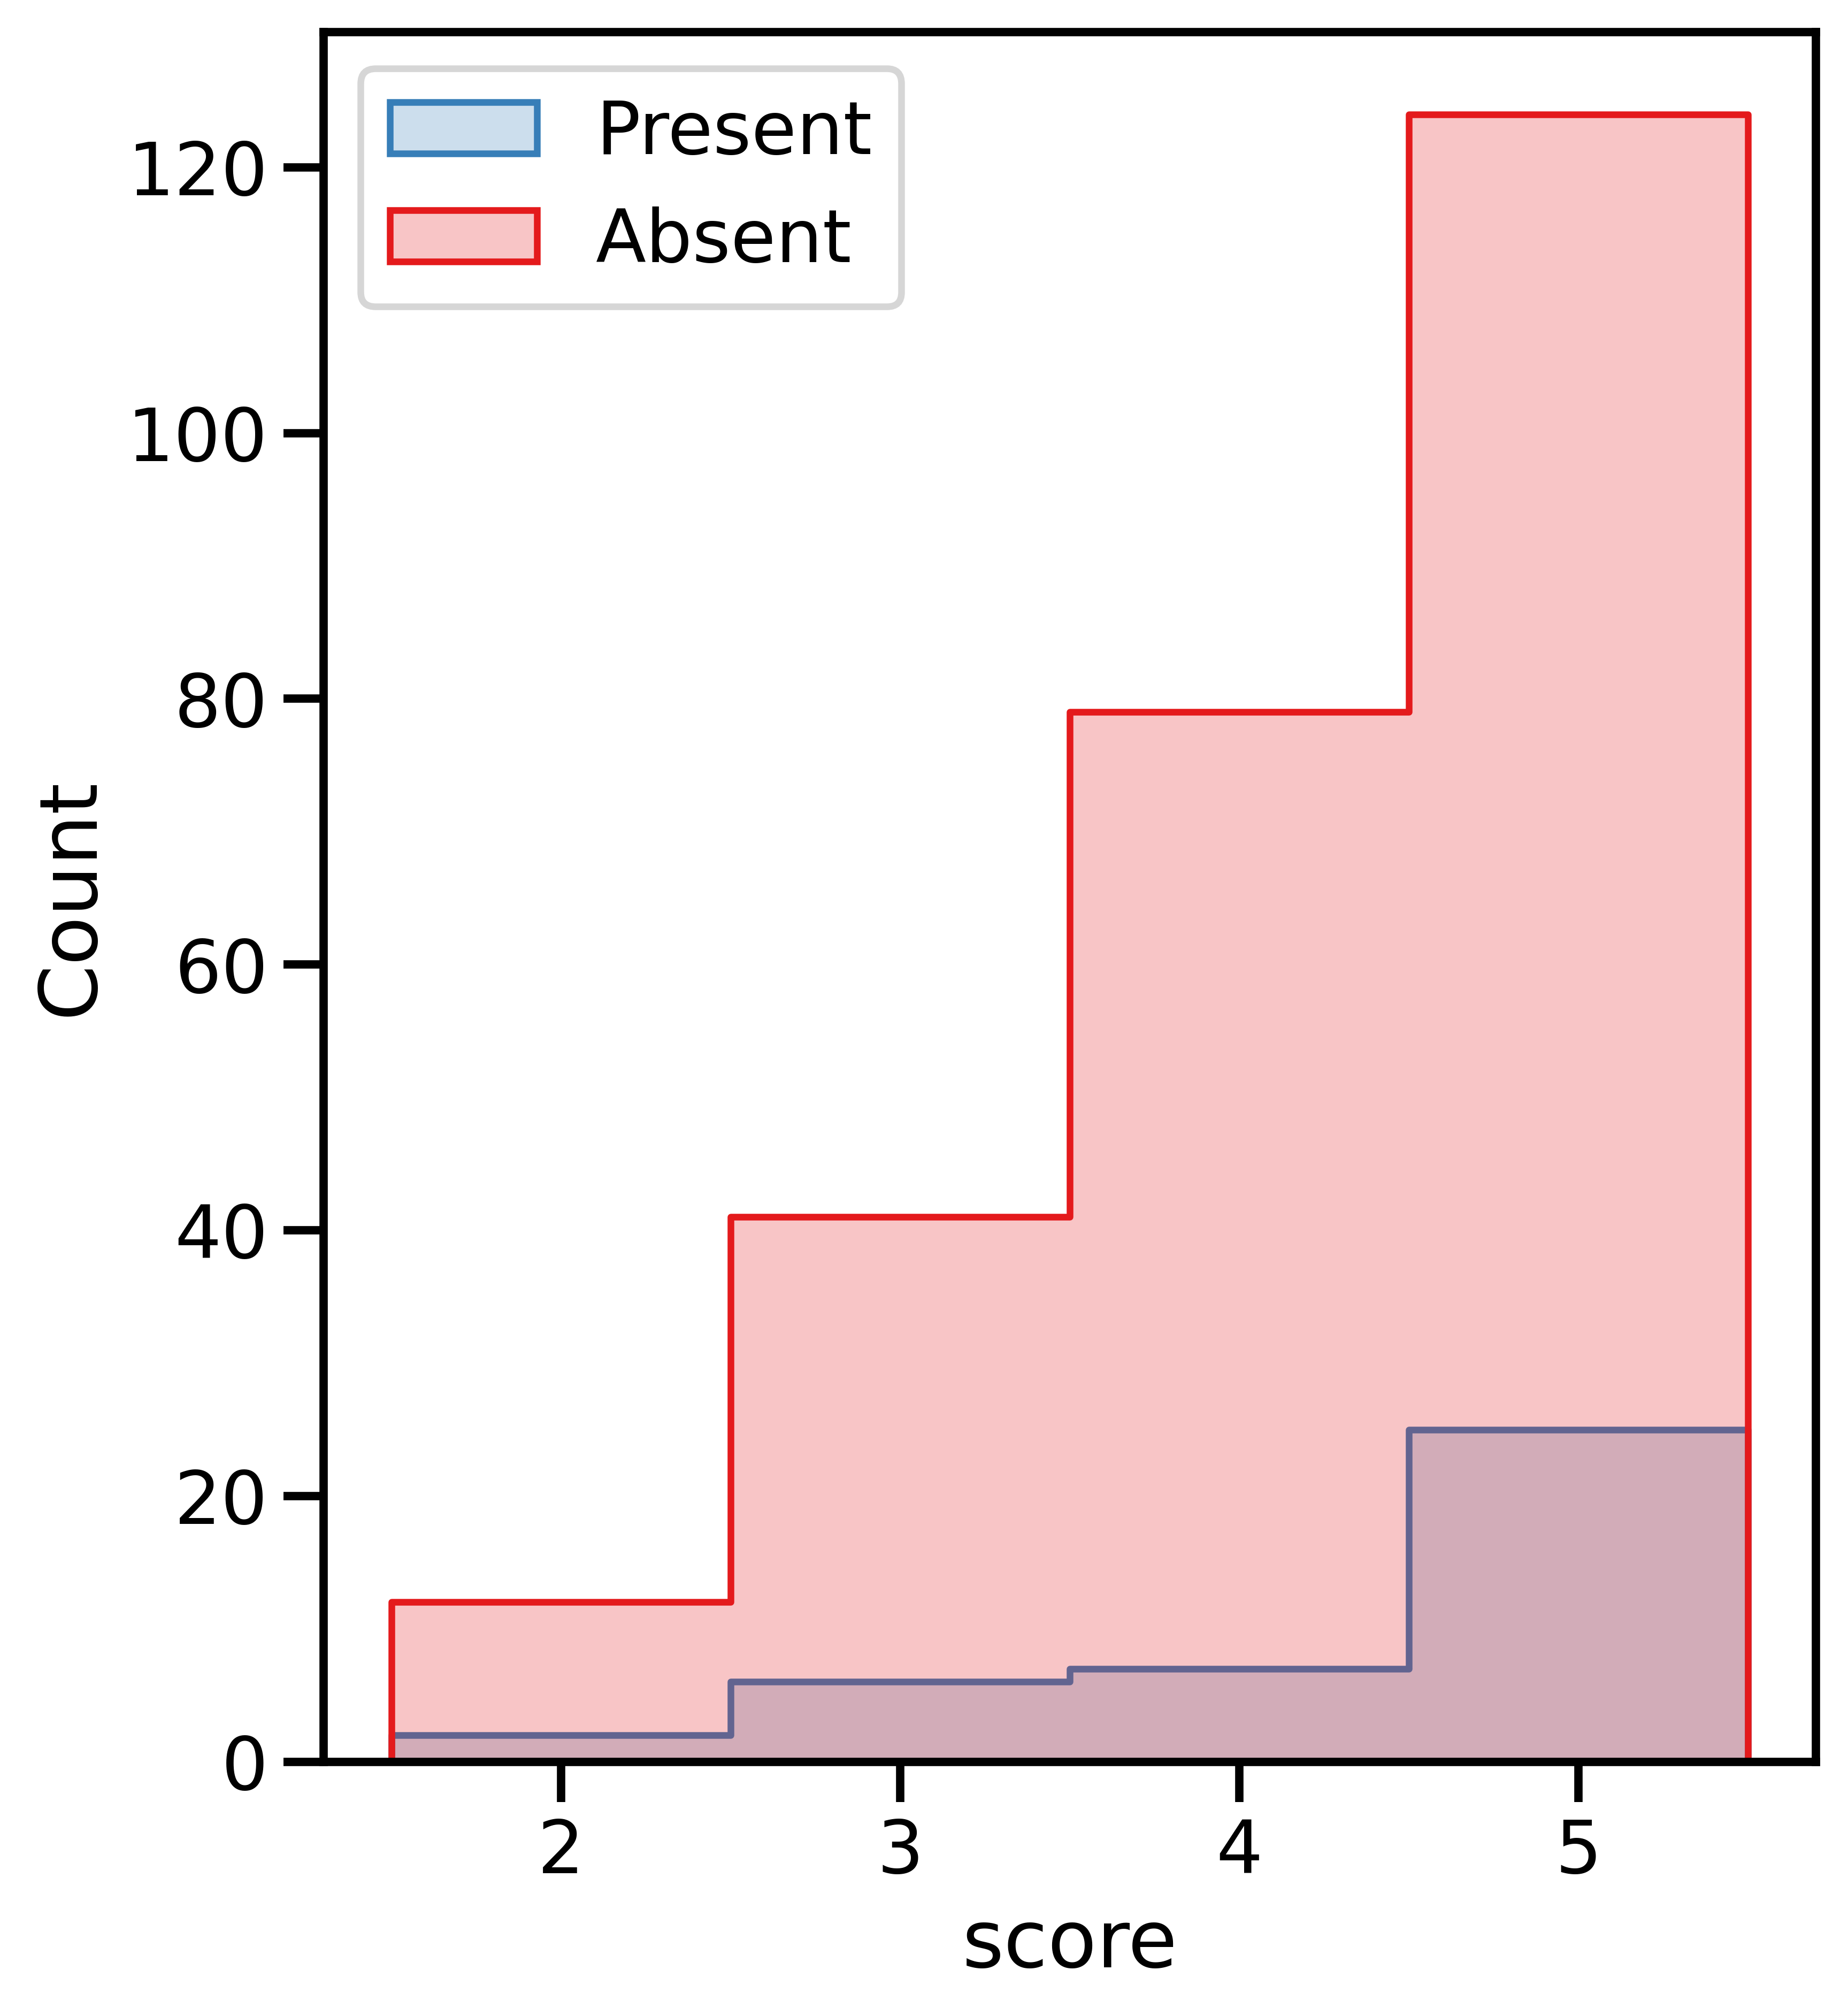

In [202]:
plt.figure(figsize=(6,7), dpi=600)
# fig, ax = plt.subplots()
ax = sns.histplot(merged_df, x='score', hue='cancer', bins=4, binrange=(1.5,5.5),
                     multiple="layer", element="step", palette="Set1")
plt.legend(labels=['Present','Absent'], loc="upper left")
plt.show()
fig = ax.get_figure()
fig.tight_layout()
out_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/tmp/figures/sa_cancer.png"
fig.savefig(out_path, dpi='figure')

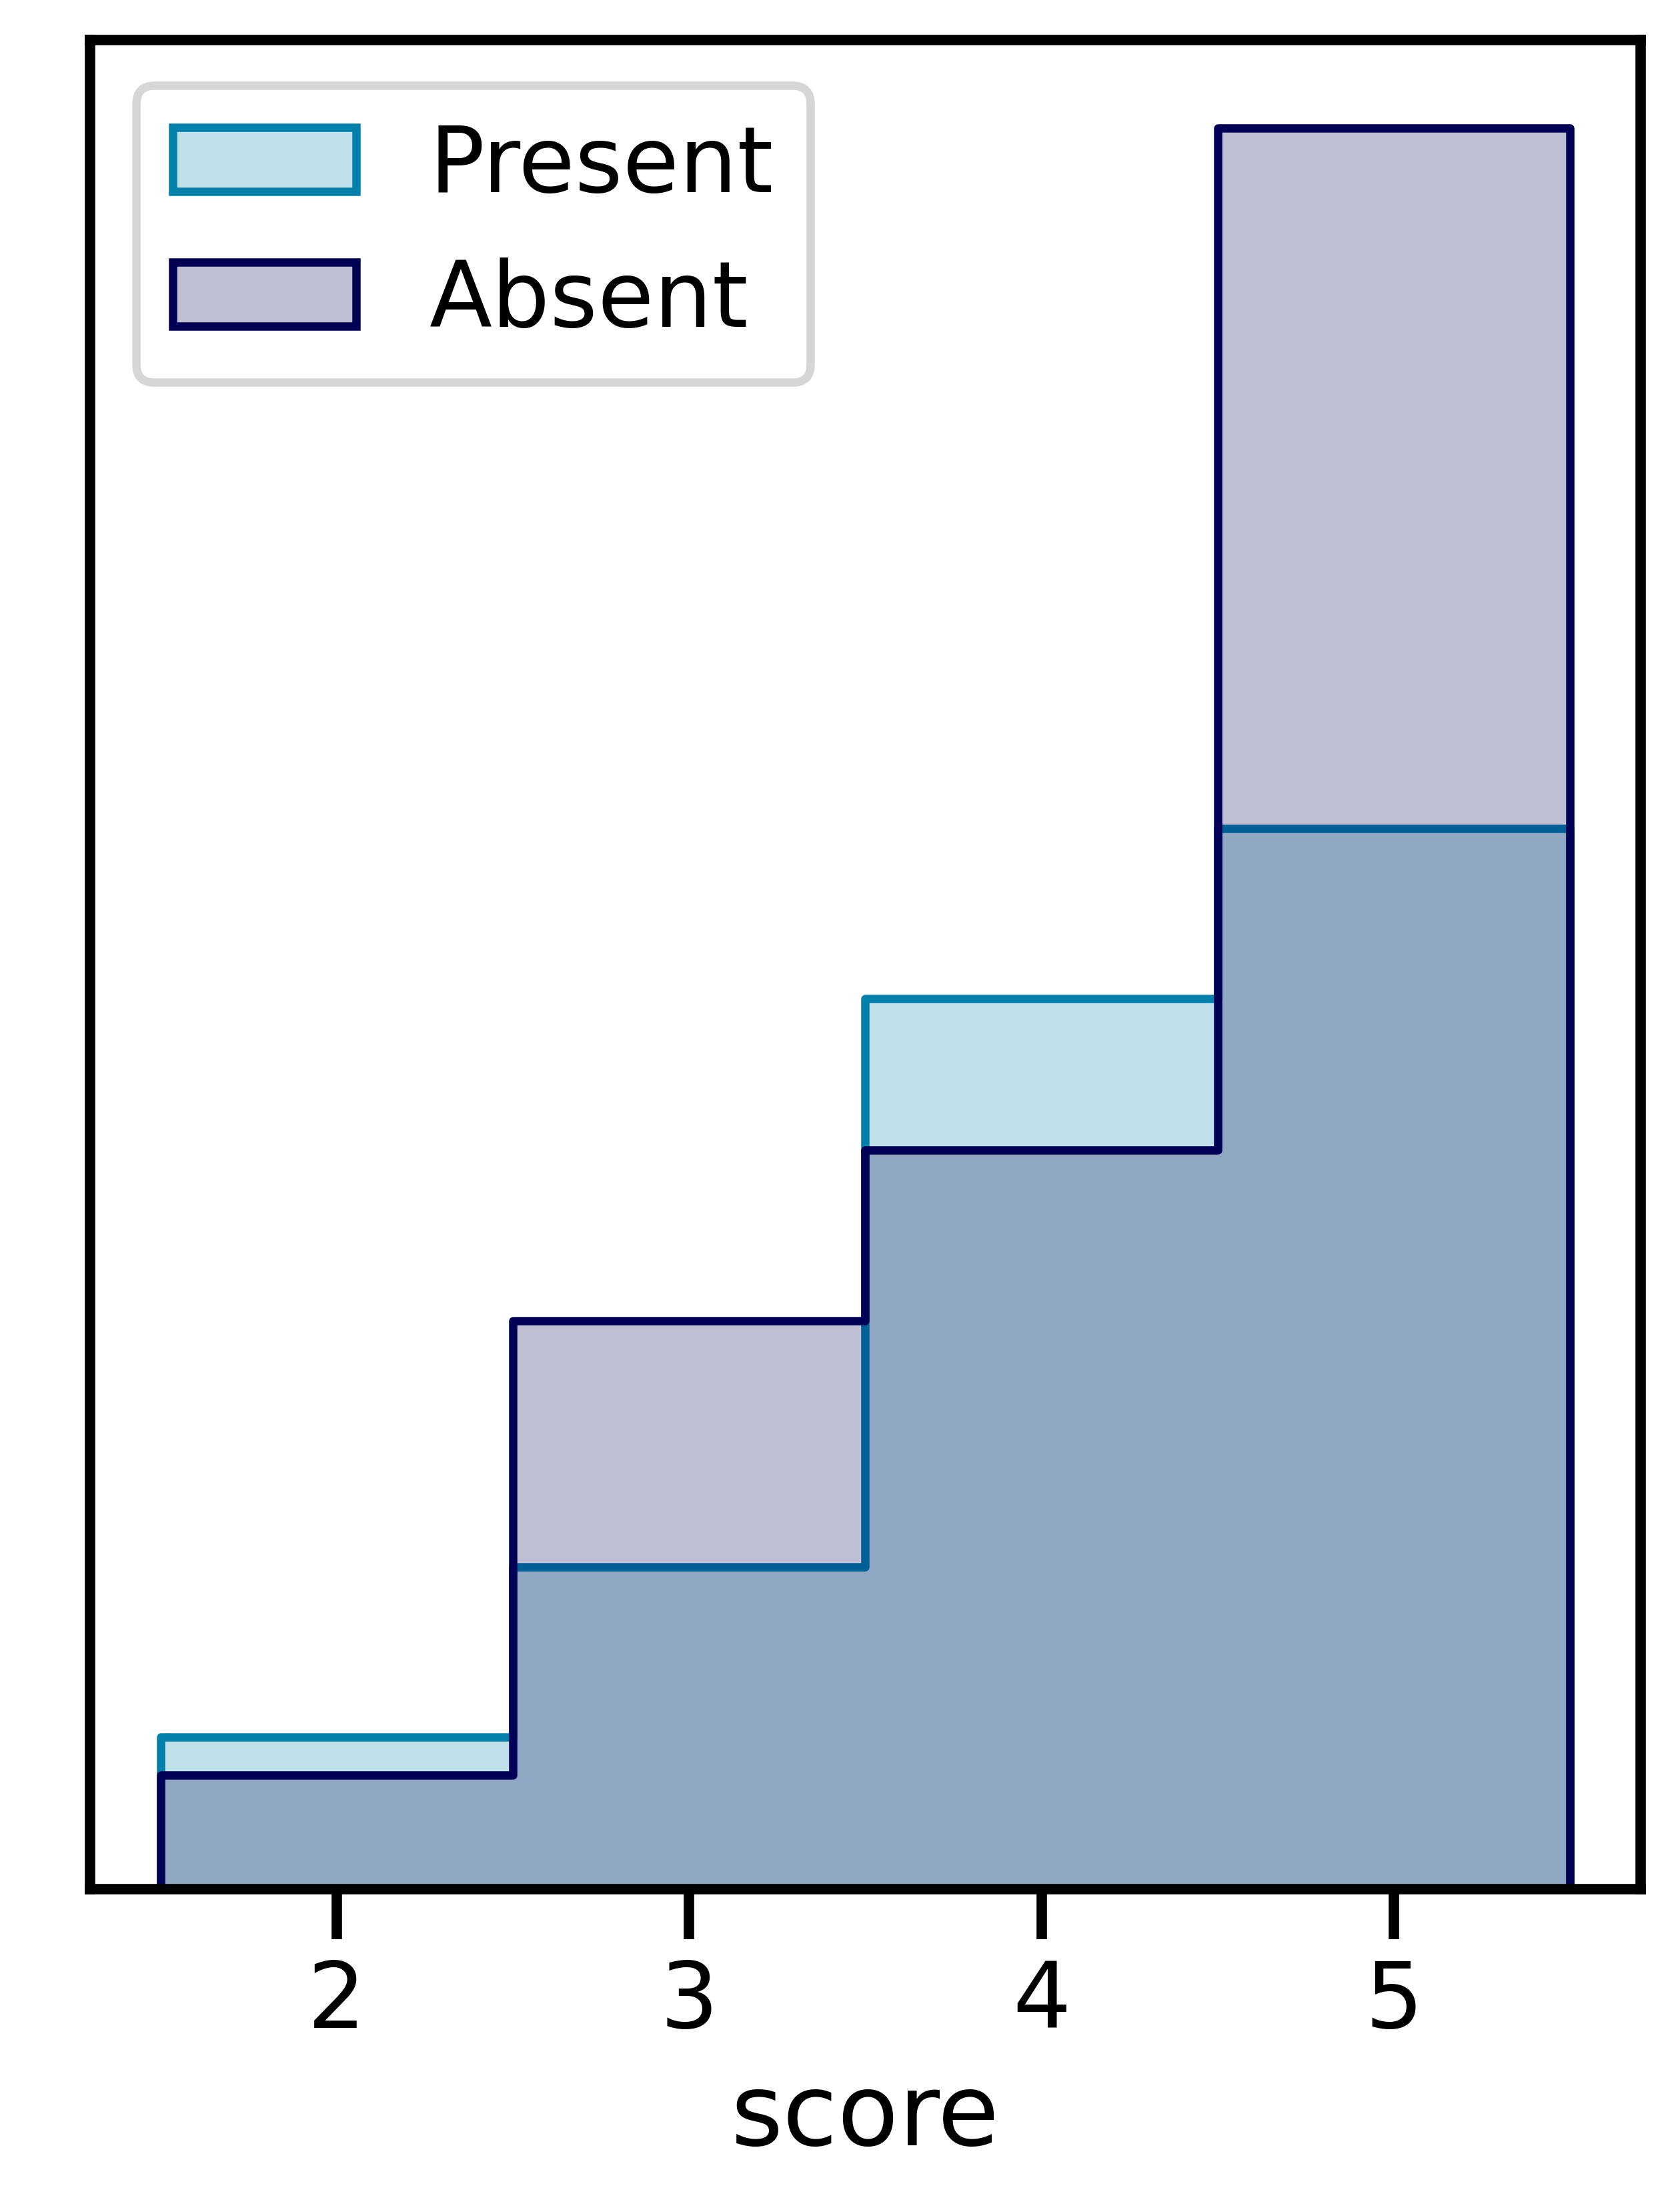

In [198]:
plt.figure(figsize=(5,6), dpi=600)
# fig, ax = plt.subplots()
ax = sns.histplot(merged_df, x='score', hue='copd', bins=4, binrange=(1.5,5.5),
                     multiple="layer", element="step", palette="ocean")
plt.legend(labels=['Present','Absent'], loc="upper left")
ax.get_yaxis().set_visible(False)
plt.show()
fig = ax.get_figure()
fig.tight_layout()
out_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/tmp/figures/sa_copd.png"
fig.savefig(out_path, dpi='figure')

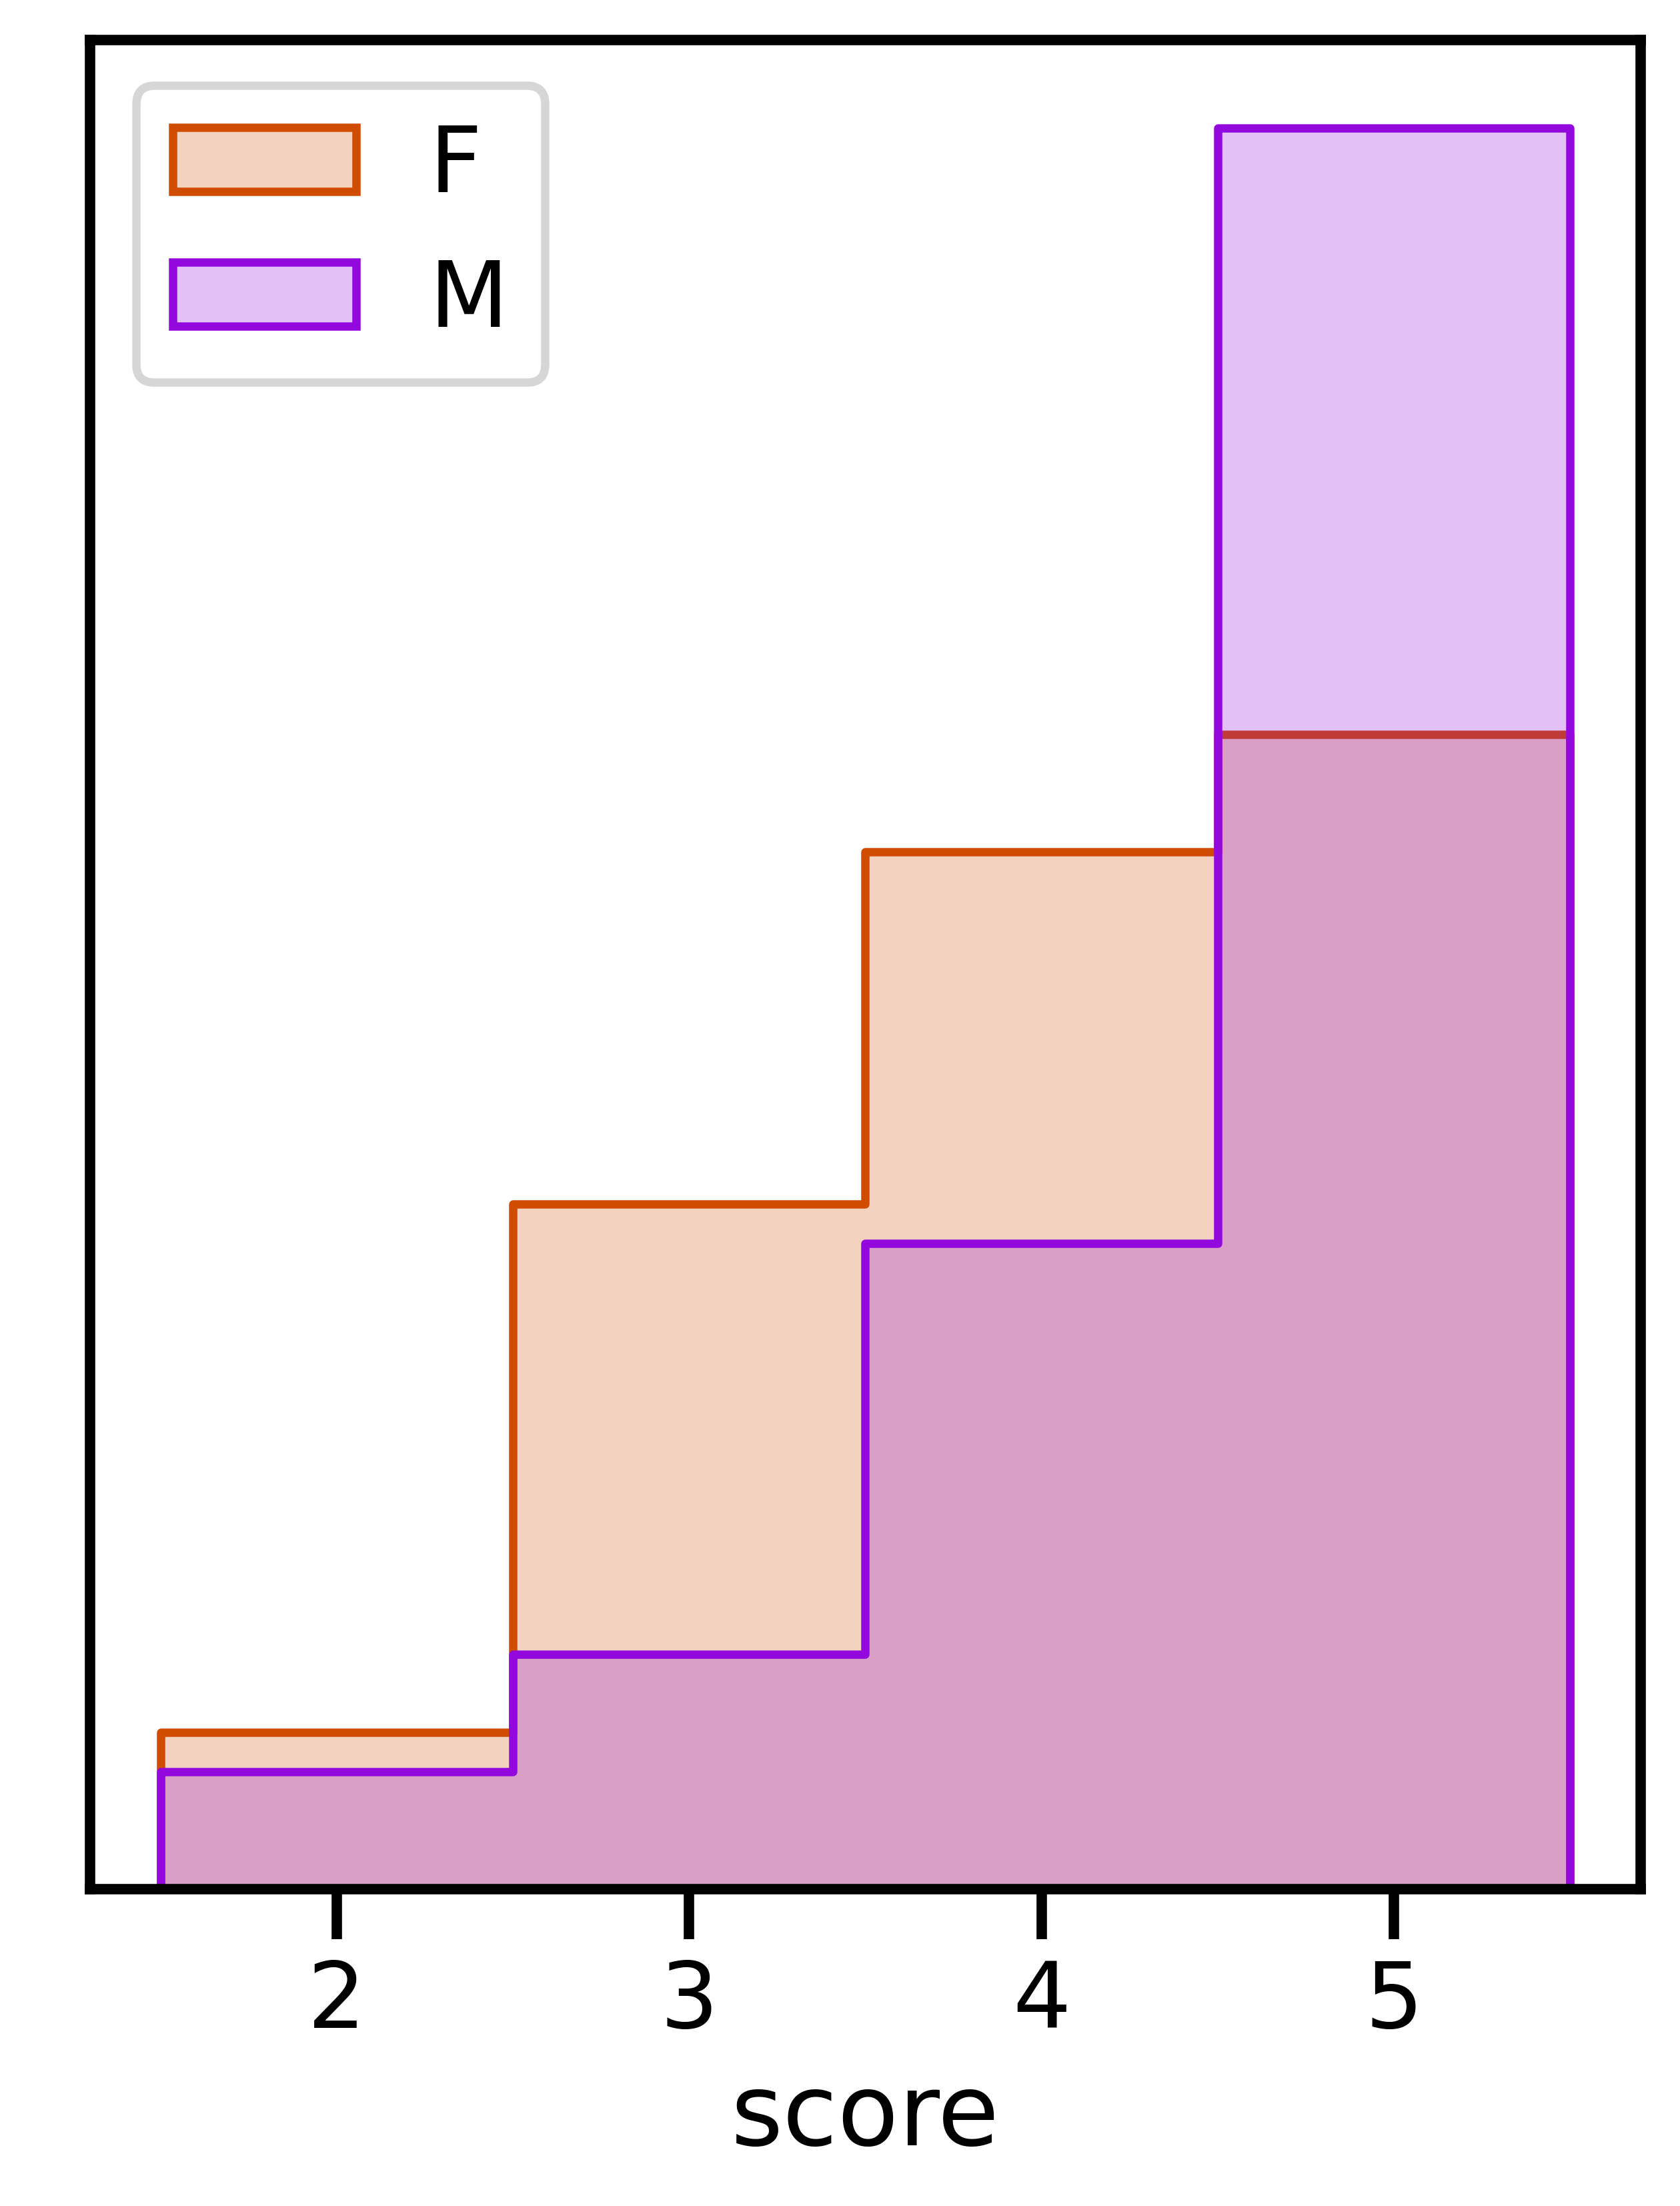

In [199]:
plt.figure(figsize=(5,6), dpi=600)
# fig, ax = plt.subplots()
ax = sns.histplot(merged_df, x='score', hue='sex', bins=4, binrange=(1.5,5.5),
                     multiple="layer", element="step", palette="gnuplot")
plt.legend(labels=['F','M'], loc="upper left")
ax.get_yaxis().set_visible(False)
plt.show()
fig = ax.get_figure()
fig.tight_layout()
out_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/tmp/figures/sa_sex.png"
fig.savefig(out_path, dpi='figure')